In [1]:
pip install sodapy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sodapy import Socrata
import geopandas as gpd
from shapely.geometry import Point

client = Socrata("data.cityofchicago.org", None)

In [3]:


# crashes_data = pd.read_csv(r'Traffic_Crashes_-_Crashes.csv')
# congestion_data = pd.read_csv(r'Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Region_-_2018-Current.csv')




# Set an initial value for the offset
offset = 0
batch_size = 1000  # Set batch size as per API's maximum limit or preferred size
results = []
count = 0
skip = 10000

while True and count < 10:
    batch = client.get("85ca-t3if", order="CRASH_DATE DESC", limit=batch_size, offset=offset)
    if not batch:
        break  # Exit loop if no more records are returned
    results.extend(batch)
    offset += batch_size # Increase the offset to move to the next batch
    count += 1

client = Socrata("data.cityofchicago.org", None)


results_df = pd.DataFrame.from_records(results)
crashes_data = results_df
crashes_data

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,location,intersection_related_i,crash_date_est_i,statements_taken_i,private_property_i,photos_taken_i,work_zone_i,work_zone_type,dooring_i,workers_present_i
0,0f2ac1f50f4cde776319eb6160ef834614516bb5dd2c5f...,2023-11-26T22:50:00.000,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.71526084...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cfdb41ca6fcd4701a665bae94bbf39859b46a0a6460299...,2023-11-26T21:46:00.000,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.59785302...",Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f7fe6e5123384ebb6cb76f26c387db51c5a5d7794081bc...,2023-11-26T21:25:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.58508645...",Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30677b22229443f87176aa4cabef7521bab344cbac6c20...,2023-11-26T21:00:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.63084518...",NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,343513291aa402f61bc5042c9f2e037136e3d08d020ff1...,2023-11-26T21:00:00.000,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.63285766...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4bb402abae0a9b8fa45bdbc46d7dda1045dff0b67dacfd...,2023-10-23T18:40:00.000,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.62057393...",Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,ddd264969769fa83a68aaa9b8d23a595444641d221e2a5...,2023-10-23T18:34:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.75048818...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,7b1c6d13cece20aa8a304dbaf07aaee00842b1f965f987...,2023-10-23T18:30:00.000,30,UNKNOWN,UNKNOWN,UNKNOWN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.67622128...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,e8a0e5b5a20d52cb68a905abc85ff9271532de7a5b84a8...,2023-10-23T18:30:00.000,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,"{'type': 'Point', 'coordinates': [-87.65082896...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:



# Set an initial value for the offset
offset = 0
batch_size = 1000  # Set batch size as per API's maximum limit or preferred size
results = []
count = 0
skip = 10000
# Loop until no more new records are returned
while True and count < 200:
    batch = client.get("kf7e-cur8", order="TIME DESC", limit=batch_size, offset=offset)
    if not batch:
        break  # Exit loop if no more records are returned
    results.extend(batch)
    offset += batch_size # Increase the offset to move to the next batch
    count += 1

results_df = pd.DataFrame.from_records(results)
congestion_data = results_df
congestion_data

,time,region_id,speed,region,bus_count,num_reads,hour,day_of_week,month,description,record_id,west,east,south,north,nw_location,se_location
0,2023-11-27T16:51:53.000,16,23.18,Near South-Douglas,60,951,16,2,11,Pershing to Roosevelt. Stewart to Lake Shore,16-202311272251,-87.636322,-87.597952,41.822792,41.866129,"{'type': 'Point', 'coordinates': [-87.636322, ...","{'type': 'Point', 'coordinates': [-87.597952, ..."
1,2023-11-27T16:51:53.000,5,21.82,Dunning-Portage-Belmont Cragn,76,1845,16,2,11,North Ave to Montrose. East River to Cicero,05-202311272251,-87.84621,-87.747456,41.909269,41.960669,"{'type': 'Point', 'coordinates': [-87.84621, 4...","{'type': 'Point', 'coordinates': [-87.747456, ..."
2,2023-11-27T16:51:53.000,20,25.23,Fuller-Grand Blvd-Washington Park,65,1486,16,2,11,71st to Pershing. Steward to Cottage Grove,20-202311272251,-87.636322,-87.606334,41.764066,41.822792,"{'type': 'Point', 'coordinates': [-87.636322, ...","{'type': 'Point', 'coordinates': [-87.606334, ..."
3,2023-11-27T16:51:53.000,9,22.5,Austin,37,862,16,2,11,Roosevelt to North Ave. Austin to Cicero,09-202311272251,-87.775947,-87.747456,41.866129,41.909269,"{'type': 'Point', 'coordinates': [-87.775947, ...","{'type': 'Point', 'coordinates': [-87.747456, ..."
4,2023-11-27T16:51:53.000,24,25.23,South Shore-S Chicago-Avlon,61,1311,16,2,11,91st to 71st. Cottage Grove to Lake Shore,24-202311272251,-87.606334,-87.526388,41.728472,41.764066,"{'type': 'Point', 'coordinates': [-87.606334, ...","{'type': 'Point', 'coordinates': [-87.526388, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2023-07-25T10:11:20.000,2,30,Far North West,40,843,10,3,7,North of Montrose. East River to Cicero,02-202307251511,-87.84621,-87.747456,41.960669,42.0190998,"{'type': 'Point', 'coordinates': [-87.84621, 4...","{'type': 'Point', 'coordinates': [-87.747456, ..."
199996,2023-07-25T10:11:20.000,7,24.55,Hermosa-Logan Square,37,854,10,3,7,North Ave to Diversy. Cicero to Ravenswood,07-202307251511,-87.747456,-87.67459,41.909269,41.931841,"{'type': 'Point', 'coordinates': [-87.747456, ...","{'type': 'Point', 'coordinates': [-87.67459, 4..."
199997,2023-07-25T10:11:20.000,29,21.82,Downtown Lakefront,41,418,10,3,7,Roosevelt to Oak. Michigan to Lake Shore,29-202307251511,-87.62308,-87.595378,41.866129,41.911401,"{'type': 'Point', 'coordinates': [-87.62308, 4...","{'type': 'Point', 'coordinates': [-87.595378, ..."
199998,2023-07-25T10:11:20.000,22,31.36,Ashburn,24,494,10,3,7,91st to 71st. Cicero to Damen,22-202307251511,-87.747456,-87.67298,41.728472,41.764066,"{'type': 'Point', 'coordinates': [-87.747456, ...","{'type': 'Point', 'coordinates': [-87.67298, 4..."


In [5]:
crashes_data['CRASH_DATE'] = pd.to_datetime(crashes_data['crash_date'])

def split_and_convert_to_float(speed):
    if isinstance(speed, float):  # If it's already a float, return as is
        return speed
    else:  # If it's a string, split and convert
        speeds = speed.split()
        return [float(s) for s in speeds if s.replace('.', '', 1).isdigit()]  # Check if 's' is a number



# Apply the function to the 'speed' column
congestion_data['speed'] = congestion_data['speed'].apply(split_and_convert_to_float)

In [ ]:
congestion_data.columns

Index(['time', 'region_id', 'speed', 'region', 'bus_count', 'num_reads',
       'hour', 'day_of_week', 'month', 'description', 'record_id', 'west',
       'east', 'south', 'north', 'nw_location', 'se_location'],
      dtype='object')

In [6]:
# Aggregate crash data by month and year


crashes_data['CRASH_DATE'] = pd.to_datetime(crashes_data['CRASH_DATE'])
crashes_monthly = crashes_data.groupby([crashes_data['CRASH_DATE'].dt.year.rename('Year'),
                                        crashes_data['CRASH_DATE'].dt.month.rename('Month')]).size().reset_index(name='crash_count')


# Convert 'time' to datetime
congestion_data['time'] = pd.to_datetime(congestion_data['time'])

# Ensure all values in 'speed' are strings, then split and convert to floats
def split_and_convert_to_float(speed):
    if isinstance(speed, float):  # If it's already a float, return as is
        return speed
    else:  # If it's a string, split and convert
        speeds = speed.split()
        return [float(s) for s in speeds if s.replace('.', '', 1).isdigit()]  # Check if 's' is a number


# print(congestion_data['time'].min(), congestion_data['time'].max())
# print(congestion_data['time'].dt.year.unique())
# print(congestion_data['time'].dt.month.unique())

# Apply the function to the 'speed' column
congestion_data['speed'] = congestion_data['speed']

# Explode the 'speed' lists into separate rows
congestion_data = congestion_data.explode('speed')

# Ensure 'speed' is numeric
congestion_data['speed'] = pd.to_numeric(congestion_data['speed'], errors='coerce')

# Drop rows with NaN values in 'speed'
congestion_data = congestion_data.dropna(subset=['speed'])

congestion_monthly = congestion_data.groupby([congestion_data['time'].dt.year.rename('Year'),
                                              congestion_data['time'].dt.month.rename('Month')]).agg({'speed': 'mean'}).reset_index()
congestion_monthly


,Year,Month,speed
0,2023,7,24.482178
1,2023,8,24.300926
2,2023,9,23.990628
3,2023,11,24.576939


In [7]:
congestion_data['hour'] = pd.to_datetime(congestion_data['time']).dt.hour

In [8]:
import matplotlib.pyplot as plt

congestion_data['bus_count'] = pd.to_numeric(congestion_data['bus_count'], errors='coerce')

# Drop any rows where 'bus_count' could not be converted
congestion_data.dropna(subset=['bus_count'], inplace=True)

# Convert 'bus_count' to integer
congestion_data['bus_count'] = congestion_data['bus_count'].astype(int)

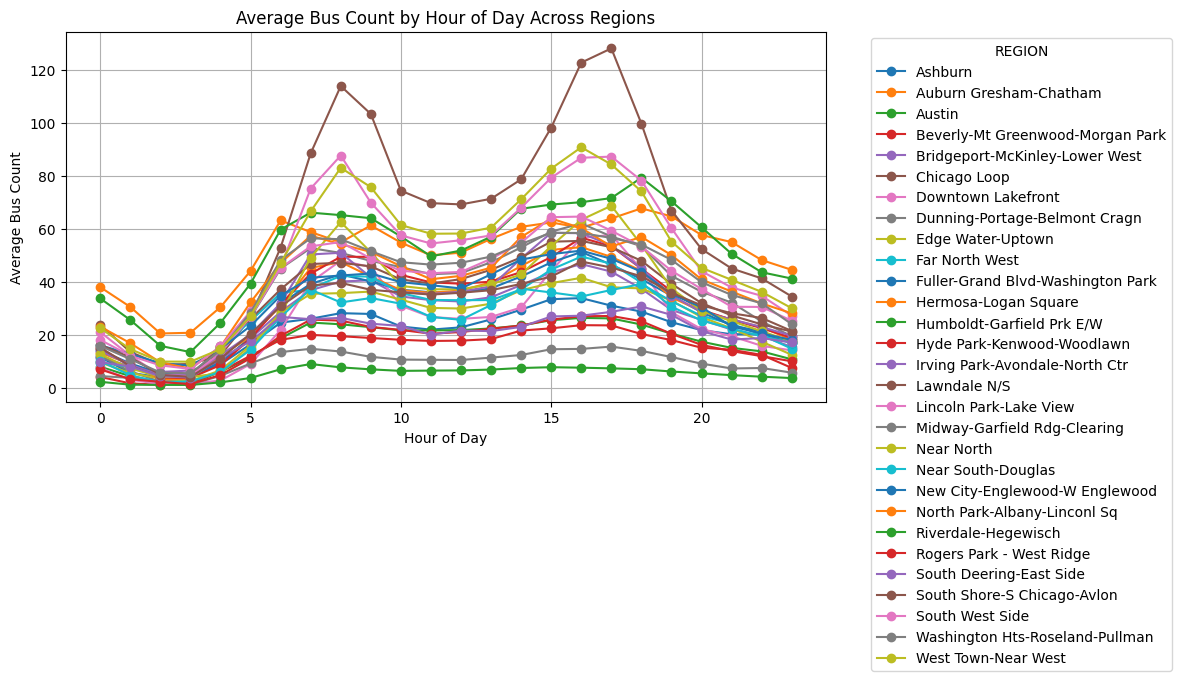

In [9]:
congestion_data['time'] = pd.to_datetime(congestion_data['time'])

# Extract the hour from the 'time' column
congestion_data['hour'] = congestion_data['time'].dt.hour

# Group by 'REGION' and 'hour' and calculate the mean 'bus_count'
region_hourly_bus_count = congestion_data.groupby(['region', 'hour'])['bus_count'].mean().reset_index()

# Pivot the DataFrame to have 'hour' as the index and 'REGION' as the columns
region_hourly_bus_count_pivot = region_hourly_bus_count.pivot(index='hour', columns='region', values='bus_count')

# Plot the results
region_hourly_bus_count_pivot.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Average Bus Count by Hour of Day Across Regions')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bus Count')
plt.legend(title='REGION', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


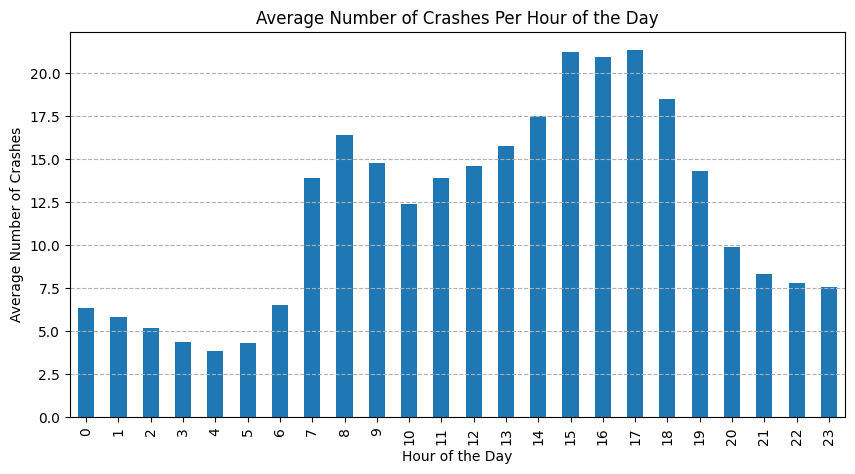

In [10]:
# Count the crashes per hour
hourly_crash_counts = crashes_data.groupby(crashes_data['CRASH_DATE'].dt.hour).size()

# Count the number of unique days in the dataset
num_days = crashes_data['CRASH_DATE'].dt.date.nunique()

# Calculate the average number of crashes per hour across all days
average_hourly_crash_counts = hourly_crash_counts / num_days

# Plot the results
plt.figure(figsize=(10, 5))
average_hourly_crash_counts.plot(kind='bar')
plt.title('Average Number of Crashes Per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Crashes')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()


In [11]:
# Group by weather condition and date, then count crashes
daily_weather_crash_counts = crashes_data.groupby([crashes_data['weather_condition'], crashes_data['CRASH_DATE'].dt.date]).size().reset_index(name='crash_counts')

# Calculate the average number of crashes per weather condition across all days
average_weather_crash_counts = daily_weather_crash_counts.groupby('weather_condition')['crash_counts'].mean().reset_index()

# Sort the results for better visualization
average_weather_crash_counts.sort_values(by='crash_counts', ascending=False, inplace=True)

# Display the DataFrame
daily_weather_crash_counts


,weather_condition,CRASH_DATE,crash_counts
0,BLOWING SNOW,2023-10-31,5
1,BLOWING SNOW,2023-11-01,1
2,CLEAR,2023-10-23,37
3,CLEAR,2023-10-24,297
4,CLEAR,2023-10-25,115
...,...,...,...
163,UNKNOWN,2023-11-22,28
164,UNKNOWN,2023-11-23,18
165,UNKNOWN,2023-11-24,7
166,UNKNOWN,2023-11-25,12


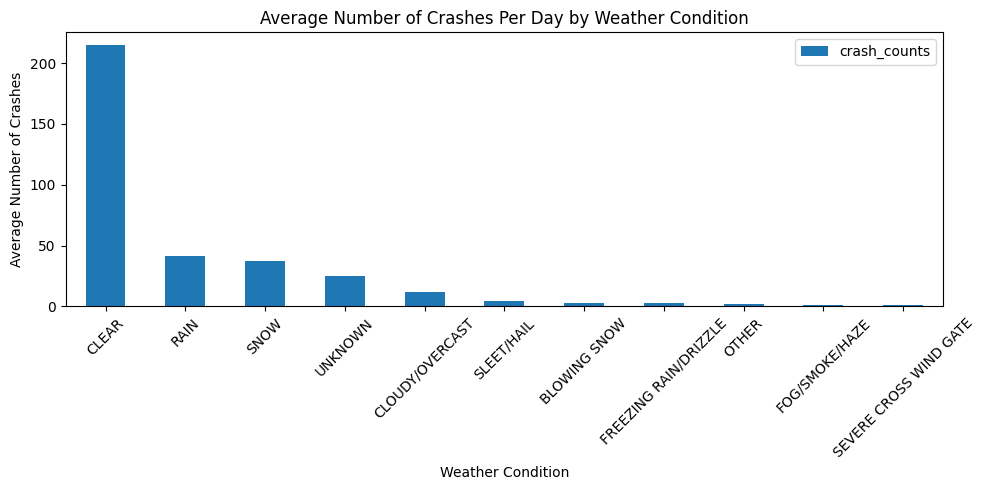

In [12]:
average_weather_crash_counts.plot(x='weather_condition', y='crash_counts', kind='bar', figsize=(10, 5))
plt.title('Average Number of Crashes Per Day by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


In [13]:
# Group by weather condition, lighting condition, and date, then count crashes
daily_weather_lighting_crash_counts = crashes_data.groupby(
    [crashes_data['weather_condition'],
     crashes_data['lighting_condition'],
     crashes_data['CRASH_DATE'].dt.date]
).size().reset_index(name='crash_counts')

# Calculate the average number of crashes per weather and lighting condition across all days
average_weather_lighting_crash_counts = daily_weather_lighting_crash_counts.groupby(
    ['weather_condition', 'lighting_condition']
)['crash_counts'].mean().reset_index()

# Sort the results for better visualization
average_weather_lighting_crash_counts.sort_values(by='crash_counts', ascending=False, inplace=True)

# Display the DataFrame
average_weather_lighting_crash_counts


,weather_condition,lighting_condition,crash_counts
5,CLEAR,DAYLIGHT,127.514286
3,CLEAR,"DARKNESS, LIGHTED ROAD",59.142857
40,SNOW,DAYLIGHT,41.500000
29,RAIN,"DARKNESS, LIGHTED ROAD",25.333333
31,RAIN,DAYLIGHT,17.444444
48,UNKNOWN,UNKNOWN,16.400000
2,CLEAR,DARKNESS,13.885714
38,SNOW,"DARKNESS, LIGHTED ROAD",11.200000
11,CLOUDY/OVERCAST,DAYLIGHT,10.863636
28,RAIN,DARKNESS,8.000000


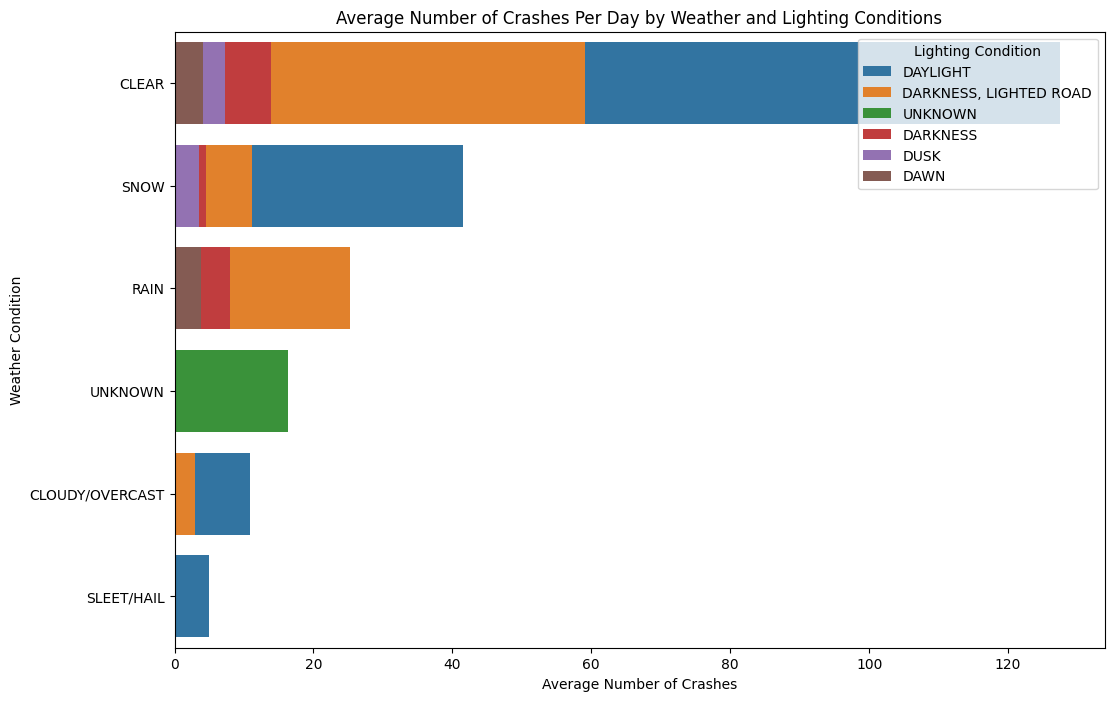

In [14]:
top_n = 20  # You can adjust this number based on your dataset and preferences
top_weather_lighting_conditions = average_weather_lighting_crash_counts.head(top_n)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='crash_counts',
    y='weather_condition',
    hue='lighting_condition',
    data=top_weather_lighting_conditions,
    dodge=False
)
plt.title('Average Number of Crashes Per Day by Weather and Lighting Conditions')
plt.xlabel('Average Number of Crashes')
plt.ylabel('Weather Condition')
plt.legend(title='Lighting Condition')
plt.show()

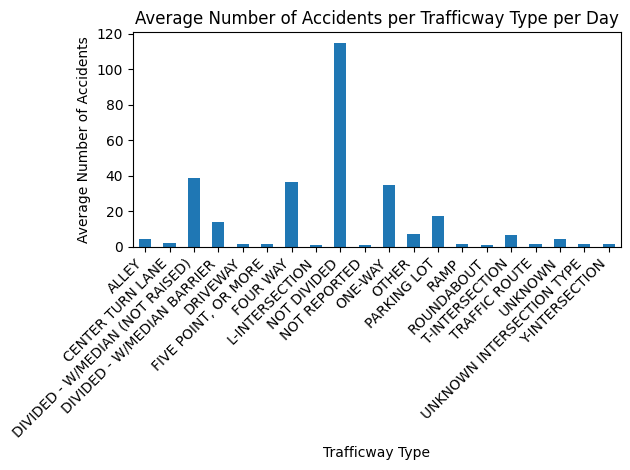

In [15]:
# Group by 'TRAFFICWAY_TYPE' and date, then count accidents
trafficway_accidents = crashes_data.groupby(['trafficway_type', crashes_data['CRASH_DATE'].dt.date]).size().reset_index(name='accident_count')

# Calculate the average number of accidents per 'TRAFFICWAY_TYPE' across all days
avg_trafficway_accidents = trafficway_accidents.groupby('trafficway_type')['accident_count'].mean().reset_index()

# Plot for 'TRAFFICWAY_TYPE'
avg_trafficway_accidents.plot(kind='bar', x='trafficway_type', y='accident_count', legend=False)
plt.title('Average Number of Accidents per Trafficway Type per Day')
plt.xlabel('Trafficway Type')
plt.ylabel('Average Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


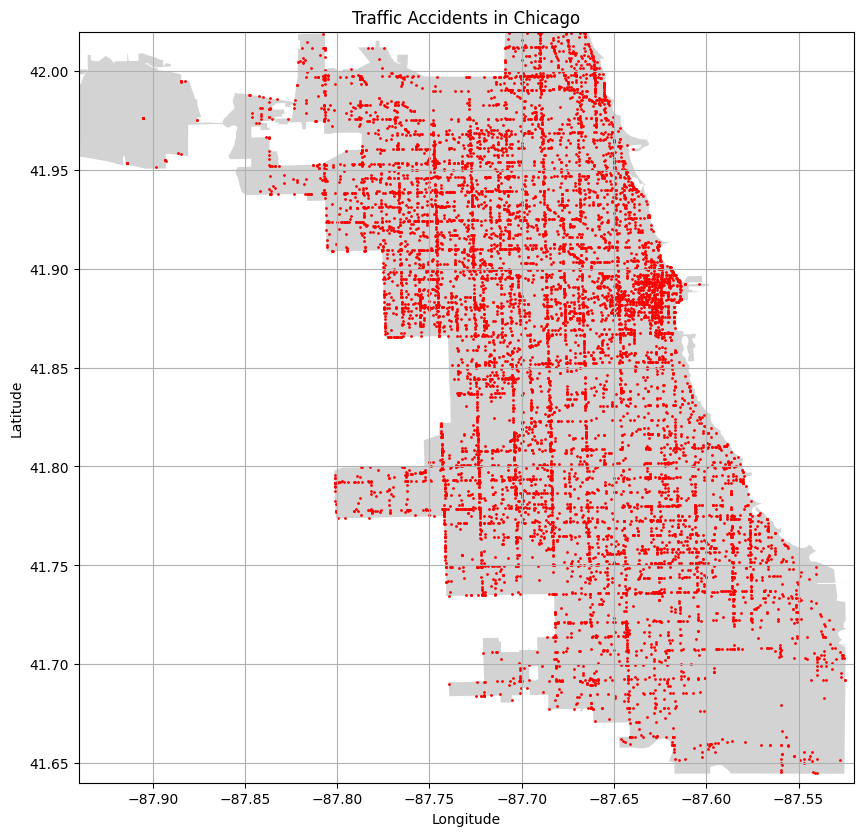

In [21]:
gdf = gpd.GeoDataFrame(
    crashes_data,
    geometry=gpd.points_from_xy(crashes_data.longitude, crashes_data.latitude)
)

# Set the coordinate reference system to latitude/longitude
gdf.crs = {'init': 'epsg:4326'}

# Load a map of Chicago as a GeoDataFrame
chicago_map = gpd.read_file('path_to_chicago_shapefile.shp')

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.plot(ax=ax, color='lightgrey')

# Plot the accidents
gdf.plot(ax=ax, markersize=1, color='red')

# Zoom in to the city limits
ax.set_xlim([-87.94, -87.52])
ax.set_ylim([41.64, 42.02])

# Add grid, title, and labels
ax.grid(True)
ax.set_title('Traffic Accidents in Chicago')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [19]:
pip install geopandas